<a href="https://colab.research.google.com/github/sukha002/AIDI/blob/master/1002/AIDI_1002_Week_7_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ML Experiment Design ...


*   Decide its a classification or a regression problem
*   Choose the appropriate metrics
*   first train-test split and compute the metrics
*  fine-tune the model using train-test-validation splits of data
*  Do k-fold validation depending upon data size.
*  perform statistical tests for significance



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
pima = pd.read_csv('/content/diabetes.csv')

In [ ]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# define X and y
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_class = logreg.predict(X_test)

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7916666666666666


In [ ]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [ ]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3229166666666667

In [ ]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [ ]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
False: [1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


#### Classification Accuracy
* Classification accuracy is the easiest classification metric to understand
* But, it does not tell you the underlying distribution of response values

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[115  15]
 [ 25  37]]


Every observation in the testing set is represented in exactly one box. It's a 2x2 matrix because there are 2 response classes
The format shown here is not universal
Take attention to the format when interpreting a confusion matrix
Basic terminology..

* True Positives (TP): we correctly predicted that they do have diabetes
37
* True Negatives (TN): we correctly predicted that they don't have diabetes
115
* False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
15
Falsely predict positive
Type I error
* False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
25
Falsely predict negative
Type II error
0: negative class
1: positive class

In [ ]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[115  15]
 [ 25  37]]


#### Metrics computed from a confusion matrix

In [ ]:
# 1. Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7916666666666666
0.7916666666666666


In [ ]:
# 2. Classification Error: Overall, how often is the classifier incorrect? Also known as "Misclassification Rate"
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.20833333333333334
0.20833333333333337


##### Sensitivity: When the actual value is positive, how often is the prediction correct?

Something we want to maximize
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "True Positive Rate" or "Recall"
* TP / all positive
* all positive = TP + FN

In [ ]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.5967741935483871
0.5967741935483871


##### Specificity: When the actual value is negative, how often is the prediction correct?

* Something we want to maximize
* How "specific" (or "selective") is the classifier in predicting positive instances?
* TN / all negative
* all negative = TN + FP

In [ ]:
specificity = TN / (TN + FP)

print(specificity)

0.8846153846153846


##### False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [ ]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.11538461538461539
0.11538461538461542


##### Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [ ]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7115384615384616
0.7115384615384616


### Adjusting the classification threshold

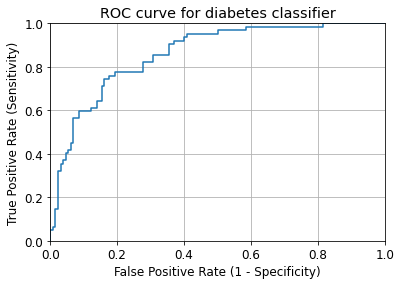

In [ ]:
logreg.predict(X_test)[0:10]
logreg.predict_proba(X_test)[0:10]
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Evaluating the thresholds

In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
evaluate_threshold(0.5)
evaluate_threshold(0.3)

Sensitivity: 0.5967741935483871
Specificity: 0.9153846153846154
Sensitivity: 0.7741935483870968
Specificity: 0.7230769230769231


#### AUC 
AUC is the percentage of the ROC plot that is underneath the curve

In [ ]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8604218362282878


* AUC is useful as a single number summary of classifier performance
Higher value = better classifier
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
* AUC is useful even when there is high class imbalance (unlike classification accuracy

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8292820512820512

### Regression Experiment Design

There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).
* MAE: The easiest to understand. Represents average error
* MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.
* RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.


In [ ]:
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/regression_sample.csv')

In [ ]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
y = df['GPA']
x1 = df['SAT']

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           7.20e-11
Time:                        18:20:55   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

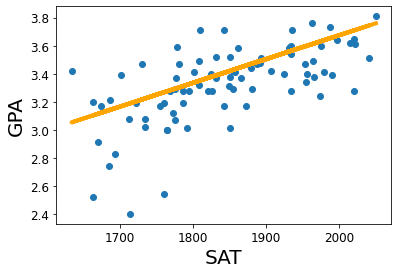

In [ ]:
plt.scatter(x1,y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
print("mean_absolute error :", mean_absolute_error(df['GPA'],yhat))

mean_absolute error : 0.16250119047619038


In [ ]:
print("mean_absolute error :", mean_squared_error(df['GPA'],yhat))

mean_absolute error : 0.050001431071428536


In [ ]:
print("root_mean_absolute error :", np.sqrt(mean_squared_error(df['GPA'],yhat)))

root_mean_absolute error : 0.22360999770007722
